In [2]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 15px;
    font-family: Jetbrains Mono;
}

</style>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sta = pd.read_csv('working_data/pl_standings.csv')

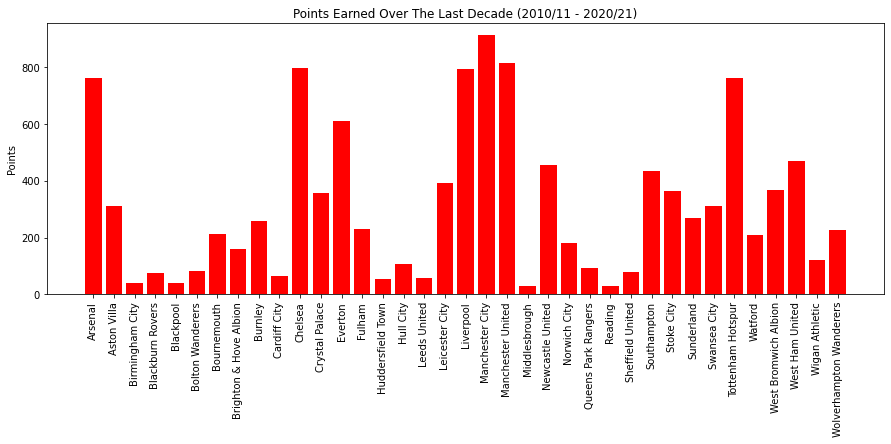

In [5]:
ovr_pts = sta.groupby('Team')['Pts'].sum()
plt.figure(figsize =(15, 5))
plt.bar(ovr_pts.index, ovr_pts, color = 'red')
plt.title('Points Earned Over The Last Decade (2010/11 - 2020/21)')
plt.ylabel('Points')
plt.xticks(rotation = '90')
plt.show()


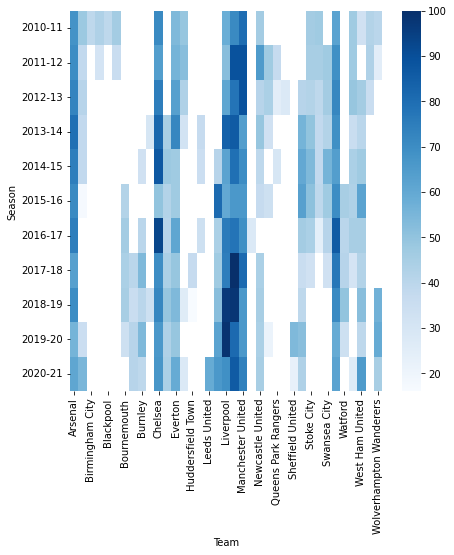

In [6]:
her = pd.DataFrame()
her['Points'] = sta.groupby(['Team', 'Season'])['Pts'].sum()

pvther = her.pivot_table(index = 'Season', columns = 'Team', values = 'Points')
plt.figure(figsize = (7, 7))
sns.heatmap(pvther, cmap = 'Blues')
plt.show()


In [7]:
teams = pd.DataFrame()

utd = sta[sta['Team'] == 'Manchester United'].Pts
utd.index = np.arange(1, 12)
city = sta[sta['Team'] == 'Manchester City'].Pts
city.index = np.arange(1, 12)
ars = sta[sta['Team'] == 'Arsenal'].Pts
ars.index = np.arange(1, 12)
liv = sta[sta['Team'] == 'Liverpool'].Pts
liv.index = np.arange(1, 12)
che = sta[sta['Team'] == 'Chelsea'].Pts
che.index = np.arange(1, 12)
tot= sta[sta['Team'] == 'Tottenham Hotspur'].Pts
tot.index = np.arange(1, 12)


teams['United'] = utd
teams['City'] = city
teams['Arsenal'] = ars
teams['Liverpool'] = liv
teams['Chelsea'] = che
teams['Tottenham']= tot
teams



,United,City,Arsenal,Liverpool,Chelsea,Tottenham
1,80,71,68,58,71,62
2,89,89,70,52,64,69
3,89,78,73,61,75,72
4,64,86,79,84,82,69
5,70,79,75,62,87,64
6,66,66,71,60,50,70
7,69,78,75,76,93,86
8,81,100,63,75,70,77
9,66,98,70,97,72,71
10,66,81,56,99,66,59


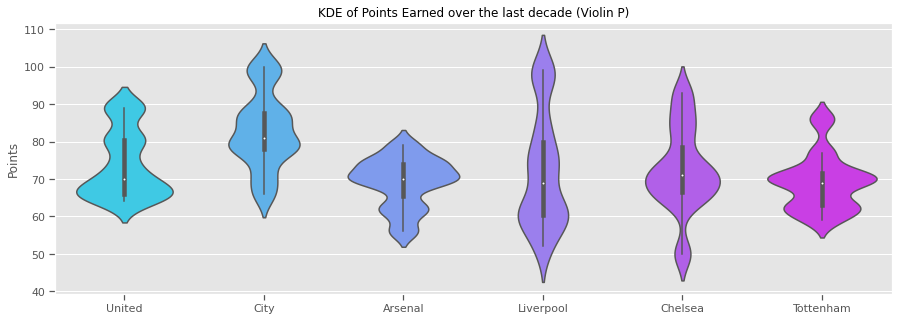

In [16]:
plt.figure(figsize = (15, 5))

sns.violinplot(data = teams, palette = 'cool', bw = 0.3)
plt.ylabel('Points')
plt.title('KDE of Points Earned over the last decade (Violin P)')
plt.show()

In [9]:
sta['Qualification or relegation'] = sta['Qualification or relegation'].apply(lambda x : 'Relegation' if 'Relegation' in x else x)

In [10]:
qor = sta.groupby(['Qualification or relegation', 'Season'])['Pts'].min()

qor.index

MultiIndex([(                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (                                                  'Not Applicable', ...),
            (              'Qualification f

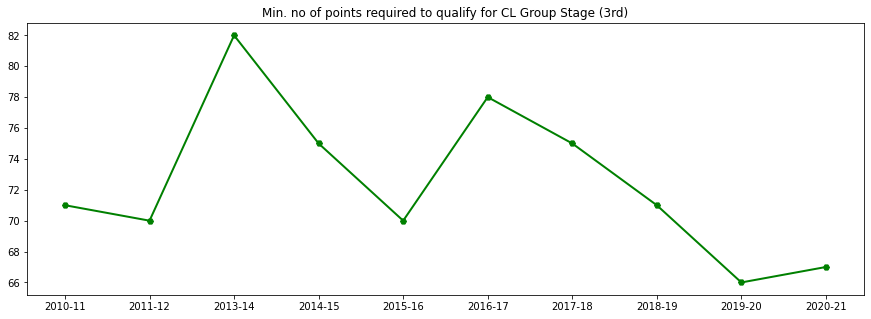

In [11]:
cl_gs = qor.loc['Qualification for the Champions League group stage']

plt.figure(figsize = (15, 5))
plt.plot(cl_gs, linewidth = '2', marker = 'H', color = 'Green')
plt.title('Min. no of points required to qualify for CL Group Stage (3rd)')
plt.show()

In [12]:
qor_rel = sta.groupby(['Qualification or relegation', 'Season'])['Pts'].max()
rel = qor_rel.loc['Relegation']

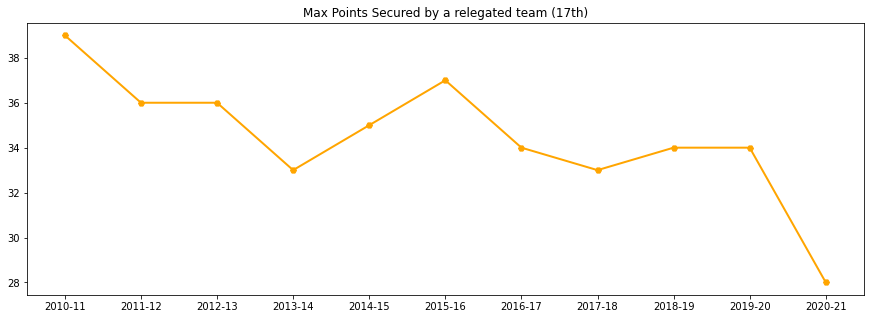

In [13]:
plt.figure(figsize = (15, 5))
plt.plot(rel, linewidth = '2', marker = 'H', color = 'orange')
plt.title('Max Points Secured by a relegated team (17th)')
plt.show()

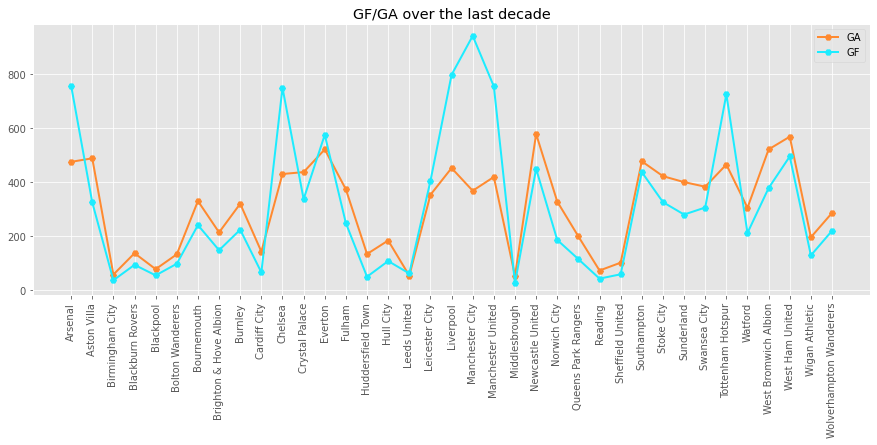

In [14]:
goalazo =sta.groupby('Team')['GF'].sum()
ogoalazo =sta.groupby('Team')['GA'].sum()


# plt.title('Total Goals Scored over the last decade')
# plt.xticks(rotation = '90')
# plt.show()

plt.figure(figsize = (15, 5))
plt.style.use('ggplot')
plt.plot(ogoalazo.index, ogoalazo, linewidth = '2', marker = 'H', color = '#FF8A30', label = 'GA')
plt.plot(goalazo.index, goalazo, linewidth = '2', marker = 'H', color = '#1DECFF', label = 'GF')

plt.title('GF/GA over the last decade')
plt.legend()
plt.xticks(rotation = '90')
plt.show()

c:\Python_VENVs\dtsci\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


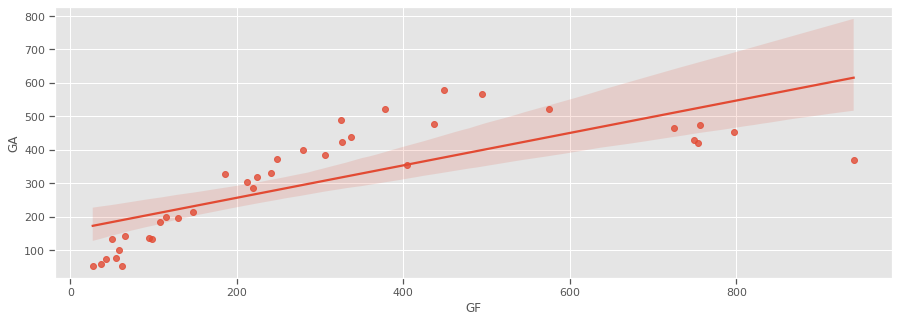

In [15]:
plt.figure(figsize = (15, 5))
sns.set_context('notebook')
sns.regplot(goalazo, ogoalazo)
plt.show()